In [1]:
pip install pymupdf4llm langchain-ollama langchain-text-splitters langchain-community faiss-cpu langgraph

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\catar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Load Document

In [2]:
import os

documents_dir = "documents/"
target_folders = ["Condotril", "Duobiotic", "Neurofil"]  # nomes dos produtos
documents = {folder: "" for folder in target_folders}  # Inicializa um dicionário para cada produto

for folder in target_folders:
    folder_path = os.path.join(documents_dir, folder)
    
    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        for doc_name in os.listdir(folder_path):
            if doc_name.endswith(".txt"):
                print(f"txt encontrado ({doc_name})!")
                file_path = os.path.join(folder_path, doc_name)
                with open(file_path, "r", encoding="utf-8") as doc:
                    content = doc.read()
                    documents[folder] += content + "\n"

txt encontrado (Condotril_bula.txt)!
txt encontrado (Duobiotic_bula.txt)!
txt encontrado (Neurofil_bula.txt)!


In [3]:
documents

{'Condotril': '=D MYPharmã\n\nCONDOTRIL\n\nO QUE É CONDOTRIL?\n\nCONDOTRIL é um suplemento alimentar que contém Sulfato de Glucosamina, Sulfato de Condroitina,\nMSM e outros compostos como a Vitamina C e Manganês. A Vitamina C contribui para a normal for-\nmação de colagénio para o funcionamento normal dos ossos e das cartilagens. O Manganês con-\ntribui para a manutenção de ossos normais e a normal formação de tecidos conjuntivos.\n\nOs suplementos alimentares são géneros alimentícios que se destinam a complementar e/ou a\nsuplementar o regime alimentar normal não devendo ser utilizados como substitutos de um regime\nalimentar variado. Constituem fontes concentradas de determinadas substâncias nutrientes ou\noutras, com efeito nutricional ou fisiológico. É importante um regime alimentar equilibrado e um\nmodo de vida saudável.\n\nIngredientes: Agente de volume: Maltodextrina; Sulfato de glucosamina (marinho); Sulfato\nde condroitina; Agente de volume: Fosfato dicálcico; Cartilagem de 

# Question Generation

In [ ]:
!pip install langchain-ollama --upgrade
!pip install jupyterlab --upgrade
!pip install -U langchain-ollama

In [ ]:
from langchain_ollama.llms import OllamaLLM

model = OllamaLLM(model="llama3.2")

# original questions

questions = ["Quais são os ingredientes do Condotril?",
"Quais são os ingredientes do Duobiotic?",
"Quais são os ingredientes do Neurofil?",
"Quais são os benefícios do Condotril?",
"Quais são os benefícios do Duobiotic?",
"Quais são os benefícios do Neurofil?",
"Quais são os efeitos do Condotril?",
"Quais são os efeitos do Duobiotic?",
"Quais são os efeitos do Nueurofil?",
"Qual é o processo de toma do Condotril?",
"Qual é o processo de toma do Duobiotic?",
"Qual é o processo de toma do Neurofil?",
"Quais são as condições de armazenamento do Condotril?",
"Quais são as condições de armazenamento do Duobiotic?",
"Quais são as condições de armazenamento do Neurofil?",
"Em que casos não se pode tomar Condotril?",
"Em que casos não se pode tomar Duobiotic?",
"Em que casos não se pode tomar Neurofil?"]

## Variants

In [ ]:
def generate_variants(model, questions, n=3):
    variants = {}
    for question in questions:
        system_prompt =  """Your role is to rephrase this question in different ways, keeping the meaning: {question}""".format(question=question)

        response = model.generate(prompts=[system_prompt], num_return_sequences=n)
        variants[question] = [variant for variant in response.generations]
    return variants

In [24]:
question_variants = generate_variants(model, questions, n=6)

In [27]:
for original, variants in question_variants.items():
    print(f"Original: {original}")
    for i, variant in enumerate(variants, 1):
        print(f"Variant {i}: {variant}")
    print()

Original: Quais são os ingredientes do Condotril?
Variant 1: [GenerationChunk(text='Claro, vou tentar recriar a pergunta de maneira diferente:\n\n* O que é o Condotril e quais são seus principais ingredientes?\n* Qual é a fórmula ativa do Condotril?\n* Quais são os componentes ativos do medicamento Condotril?\n* Como o Condotril é composto?', generation_info={'model': 'llama3.2', 'created_at': '2024-11-23T01:47:54.3313336Z', 'response': '', 'done': True, 'done_reason': 'stop', 'context': [128006, 9125, 128007, 271, 38766, 1303, 33025, 2696, 25, 6790, 220, 2366, 18, 271, 128009, 128006, 882, 128007, 271, 7927, 3560, 374, 311, 312, 28810, 420, 3488, 304, 2204, 5627, 11, 10494, 279, 7438, 25, 3489, 2852, 30710, 2709, 25795, 288, 656, 1221, 16510, 31660, 30, 128009, 128006, 78191, 128007, 271, 5176, 17606, 11, 55162, 16006, 277, 312, 745, 277, 264, 824, 61010, 409, 53460, 9008, 78273, 1473, 9, 507, 1744, 4046, 297, 1221, 16510, 31660, 384, 934, 2852, 30710, 42498, 7546, 2852, 25795, 288, 5

## Display and dictionary

In [ ]:
var = {}

for original, variants in question_variants.items():
    QV = []
    
    for variant in variants:
        responses = variant[0].text.split("\n- ")
        responses = [resp.strip("- ") for resp in responses[1:-1] if resp.strip()]
        QV.extend(responses)
    
    var[original] = QV

print(var)

for original, variants in var.items():
    print(f"Original: {original}")
    for i, variant in enumerate(variants, 1):
        print(f"Variante {i}: {variant}")
    print()


{'Quais são os ingredientes do Condotril?': [], 'Quais são os ingredientes do Duobiotic?': ['Ingredientes do Duobiotic: Qual é a fórmula ativa do Duobiotic?', 'Ingredientes do Duobiotic: O que consta no Duobiotic?', 'Duobiotic: Quais são os componentes principais desse medicamento?', 'Ingredientes do Duobiotic: Qual é a lista de substâncias ativas e inativas presentes no Duobiotic?'], 'Quais são os ingredientes do Neurofil?': ['Qual é a fórmula ativa do Neurofil?', 'O que é Neurofil e quais são seus principais componentes?', 'Quais são as substâncias ativas presentes no Neurofil?', 'Qual é a composição química do Neurofil?'], 'Quais são os benefícios do Condotril?': [], 'Quais são os benefícios do Duobiotic?': [], 'Quais são os benefícios do Neurofil?': [], 'Quais são os efeitos do Condotril?': [], 'Quais são os efeitos do Duobiotic?': [], 'Quais são os efeitos do Nueurofil?': [], 'Qual é o processo de toma do Condotril?': [], 'Qual é o processo de toma do Duobiotic?': [], 'Qual é o pr

## Normalize the question

In [89]:
import re
import unicodedata

def remove_acentos(text):
    nfkd_form = unicodedata.normalize('NFKD', text)
    return ''.join([c for c in nfkd_form if not unicodedata.combining(c)])

def remove_pontuation(text):
        return re.sub(r"[^\w\s\!\?\.\']", "", text)

var_normalized = {}

for original, variants in var.items():
    QV = []

    original_m = remove_pontuation(original)  
    original_m = remove_acentos(original_m)    
    
    for variant in variants:
        variant = remove_pontuation(variant) 
        variant = remove_acentos(variant)    
        
        QV.append(variant)
    
    var_normalized[original_m] = QV

print(var)

for original_m, variants in var_normalized.items():
    print(f"Original: {original_m}")
    for i, variant in enumerate(variants, 1):
        print(f"Variante {i}: {variant}")
    print()

{'Quais são os ingredientes do Condotril?': [], 'Quais são os ingredientes do Duobiotic?': ['Ingredientes do Duobiotic Qual e a formula ativa do Duobiotic?', 'Ingredientes do Duobiotic O que consta no Duobiotic?', 'Duobiotic Quais sao os componentes principais desse medicamento?', 'Ingredientes do Duobiotic Qual e a lista de substancias ativas e inativas presentes no Duobiotic?'], 'Quais são os ingredientes do Neurofil?': ['Qual e a formula ativa do Neurofil?', 'O que e Neurofil e quais sao seus principais componentes?', 'Quais sao as substancias ativas presentes no Neurofil?', 'Qual e a composicao quimica do Neurofil?'], 'Quais são os benefícios do Condotril?': [], 'Quais são os benefícios do Duobiotic?': [], 'Quais são os benefícios do Neurofil?': [], 'Quais são os efeitos do Condotril?': [], 'Quais são os efeitos do Duobiotic?': [], 'Quais são os efeitos do Nueurofil?': [], 'Qual é o processo de toma do Condotril?': [], 'Qual é o processo de toma do Duobiotic?': [], 'Qual é o proces

### Handle speling

In [32]:
!pip install fuzzywuzzy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\catar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [33]:
!pip install autocorrect

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/622.8 kB ? eta -:--:--
     -------------------------------------- 622.8/622.8 kB 7.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622371 sha256=fd94c0a8a59577186324153688cc496a5fa975d4e227d417649a641b6852d885
  Stored in directory: c:\users\catar\appdata\local\pip\cache\wheels\b6\28\c2\9ddf8f57f871b55b6fd0ab99c887531fb9a66e5ff236b82aee
Successfully built autocorrect



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\catar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
from fuzzywuzzy import fuzz
from autocorrect import Speller
import re

spell = Speller(lang='pt')

def normalize_text(text):
        return re.sub(r"[^\w\s\!\?\.\~\´\`\^\']", "", text)

def normalize_question(user_question, quest_variants):
    for original, variants in quest_variants.items():
        if user_question.lower() == original or user_question.lower() in [variant.lower() for variant in variants]:
            return original
    return user_question

def corect_spelling(user_question, quest_variants):
    best_score = 0
    better_response = user_question

    user_question = spell(user_question)
    user_question = normalize_text(user_question)

    for original, variants in quest_variants.items():
        for variant in variants:
            #user_question = normalize_text(user_question)
            variant = normalize_text(variant)
            score = fuzz.ratio(user_question.lower(), variant.lower())
            if score > best_score:
                best_score = score
                if score >= 90:  # Limite de similaridade
                    better_response = original
    return better_response
                



In [102]:
teste_com_erros = "Qual é a fórmula ativa do Neurofil?"
result = corect_spelling(teste_com_erros, var_normalized)
result = normalize_question(result, var_normalized)
print(result)

Quais sao os ingredientes do Neurofil?


### Create Chunks

In [ ]:
from langchain_text_splitters import CharacterTextSplitter

text_splitter = CharacterTextSplitter(
    separator="\n\n",
    chunk_size=1200, # o chunk_size tem que ser grande para termos o maximo de informaçao sobre um produto num vetor apenas
    chunk_overlap=200,
    length_function=len,
    is_separator_regex=False,
)

docs = []
for name, content in documents.items():
    # Adiciona o nome do medicamento no início do conteúdo antes de dividir
    full_content = f"Medicamento: {name}\n\n{content}"
    chunks = text_splitter.create_documents([full_content])
    
    # Adiciona o nome do medicamento diretamente ao conteúdo de cada chunk
    for chunk in chunks:
        chunk.metadata = {"medicamento": name}
        chunk.page_content = f"{name}\n\n{chunk.page_content}"
    
    docs.extend(chunks)

for _, (product, content) in enumerate(documents.items()):
    num_characters = len(content)
    print(f"Número de caracteres no documento '{product}': {num_characters}")

print("Número de documents: ", len(docs))

Número de caracteres no documento 'Condotril': 3161
Número de caracteres no documento 'Duobiotic': 3207
Número de caracteres no documento 'Neurofil': 2871
Número de documents:  10


In [20]:
docs

[Document(metadata={'medicamento': 'Condotril'}, page_content='Condotril\n\nMedicamento: Condotril\n\n=D MYPharmã\n\nCONDOTRIL\n\nO QUE É CONDOTRIL?\n\nCONDOTRIL é um suplemento alimentar que contém Sulfato de Glucosamina, Sulfato de Condroitina,\nMSM e outros compostos como a Vitamina C e Manganês. A Vitamina C contribui para a normal for-\nmação de colagénio para o funcionamento normal dos ossos e das cartilagens. O Manganês con-\ntribui para a manutenção de ossos normais e a normal formação de tecidos conjuntivos.\n\nOs suplementos alimentares são géneros alimentícios que se destinam a complementar e/ou a\nsuplementar o regime alimentar normal não devendo ser utilizados como substitutos de um regime\nalimentar variado. Constituem fontes concentradas de determinadas substâncias nutrientes ou\noutras, com efeito nutricional ou fisiológico. É importante um regime alimentar equilibrado e um\nmodo de vida saudável.'),
 Document(metadata={'medicamento': 'Condotril'}, page_content='Condotr

### Create VectorStore/Retriever

In [21]:
# ollama needs to be installed
# https://ollama.com/
# https://github.com/ollama/ollama/tree/main/docs
from langchain_ollama import OllamaEmbeddings
from langchain_community.vectorstores import FAISS

embedding_model = OllamaEmbeddings(
    # model="nomic-embed-text",
    model="llama3.2:1b",
)

vectorstore = FAISS.from_documents(docs, embedding=embedding_model)
vectorstore.save_local(folder_path = 'vectorstore') # save the vectorstore locally

In [22]:
retriever = FAISS.load_local(
    folder_path='vectorstore',
    embeddings=embedding_model,
    allow_dangerous_deserialization=True
    ).as_retriever(search_kwargs={"k" : 5})

In [23]:
question = "Quais são os ingredientes do Condotril"
retriever.invoke(question)

[Document(metadata={'medicamento': 'Condotril'}, page_content='Condotril\n\nIngredientes: Agente de volume: Maltodextrina; Sulfato de glucosamina (marinho); Sulfato\nde condroitina; Agente de volume: Fosfato dicálcico; Cartilagem de tubarão; Aroma de laran-\nja; Metilsulfonilmetano (MSM); Extrato seco de Bambusa vulgaris (Bambu), exsudado do\ncaule, doseado a 75% de Sílica; Extrato seco de Harpagophytum procumbens (Harpago), raíz,\ndoseado a 2% de Harpagósidos; Acidificante: Ácido cítrico; Colagénio hidrolisado tipo 1l;\nVitamina C (Ácido t-ascórbico); Antiaglomerante: Dióxido de silício; Gluconmato de manganês —\n(Manganês); Hialuronato de sódio (Ácido hialurónico); Edulcorante: Sucralose.\n\nINFORMAÇÃO COMPLEMENTAR\n\nIngredientes Quantidade diária — % VRN*\nF (1saqueta)\n\nSulfato de Glucosamina 750 mg ”\nSulfato de Condroitina 300 mg ””\nCartilagem de tubarão 150 mg h\nMetilsulfonilmetano (MSM) 120 mg ”\nSílica 90 mg Ló\nExtrato seco de Harpagophytum 75mg ”\nprocumbens (Harpago)\n\

In [24]:
import re
from langchain.tools import BaseTool

class ArticleInformation(BaseTool):
    name: str = "ArticleInformation"
    description: str = "This tool is used to answer questions about MyPharma food suplements. The input is the original user question"
    
    # def _run(self, question):
    #     retrieved_documents = retriever.invoke(question)
    #     return [document.page_content for document in retrieved_documents]
    
    def _run(self, question):
        retrieved_documents = retriever.invoke(question)  # Obtém documentos
        medicamentos = self._extract_medicamento(question)  # Extrai os nomes dos medicamentos (lista)
        
        # Filtra os documentos com base na metadata
        filtered_documents = [
            document for document in retrieved_documents
            if document.metadata.get('medicamento', '').lower() in {med.lower() for med in medicamentos}
        ]
        
        # Retorna os conteúdos dos documentos filtrados
        return [document.page_content for document in filtered_documents]

    
    def _extract_medicamento(self, question: str) -> list[str]:
        """Tenta identificar os medicamentos mencionados na pergunta."""
        # Lista fixa de medicamentos disponíveis
        medicamentos_disponiveis = {"Condotril", "Neurofil", "Duobiotic"}

        # Procura por todos os medicamentos mencionados na pergunta
        matches = re.findall(r'(Condotril|Neurofil|Duobiotic)', question, flags=re.IGNORECASE)
        
        # Filtra para capturar somente os medicamentos válidos, eliminando duplicatas
        medicamentos_identificados = {match.capitalize() for match in matches if match.capitalize() in medicamentos_disponiveis}
        
        if medicamentos_identificados:
            return list(medicamentos_identificados)
        else:
            raise ValueError("Não foi possível identificar nenhum medicamento na pergunta.")


### Develop Chatbot workflow (langgraph)

Tools

In [25]:
tools = [ArticleInformation()]
tools_by_name = {tool.name: tool for tool in tools}

AgentState

In [26]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage

from langgraph.graph.message import add_messages


class AgentState(TypedDict):
    # The add_messages function defines how an update should be processed
    # Default is to replace. add_messages says "append"
    messages: Annotated[Sequence[BaseMessage], add_messages]

System Prompt

In [27]:
from langchain_core.messages import SystemMessage

system_prompt =  SystemMessage("""Your role is to act as a thorough research assistant, providing complete and detailed answers based on the given context. 
  
Your final answer should be as complete as possible. Do not oversimplify or summarize unnecessaraly, considering the results of the tools you used.
Do not oversimplify or summarize the answer.

If you are unsure about what tool to use or how to correct an error, you should ask the user for help.""")

Nodes

In [28]:
from typing import Union, Literal
from langchain_ollama import ChatOllama # you can use other chat models from langchain. they need, however, to have function call capabilities (https://python.langchain.com/docs/integrations/chat/)
from langchain_core.messages import ToolMessage, HumanMessage
import json


# ollama needs to be installed
# https://ollama.com/
# https://github.com/ollama/ollama/tree/main/docs
def call_llm(state: AgentState) -> dict[str, Union[list, bool]]:
        """
        Calls the LLM model.
        
        Parameters
        ----------
        state : AgentState
            The state of the agent.
            
        Returns
        -------
        dict[str, Union[list, bool]]
            The updated state after calling the LLM model.
        """
        llm = ChatOllama( model="llama3.2:1b", temperature=0) #instantiates the LLM model
        llm = llm.bind_tools([ArticleInformation()]) #binds the tools to the LLM model
        llm_response = llm.invoke(state['messages']) #calls the LLM model
        
        return {'messages': [llm_response]} #returns the updated state
    
def tool_node(state: AgentState) -> dict[str, Union[list, bool]]:
    '''
    Runs the tool requested in the last AI message (with the tool call).
    
    Parameters
    ----------
    state : AgentState
        The state of the agent.
        
    Returns
    -------
    dict[str, Union[list, bool]]
        The updated state after running the tool.
    '''
    if messages := state.get('messages', []):
        message = messages[-1]
    else:
        raise ValueError('No messages found in input state.')
    
    outputs = []
    
    # tool_call example
    # [{'name': 'ThesisInformation',
    # 'args': {'query': 'What is the...'},
    # 'id': 'call_UwQzgi1QD9uWfBP1r6CWO5ep',
    # 'type': 'tool_call'}]
    
    for tool_call in message.tool_calls:
        tool_result = tools_by_name[tool_call['name']].invoke(
            tool_call['args']
        )
        
        outputs.append(
            ToolMessage(
                content = json.dumps(tool_result),
                name = tool_call['name'],
                tool_call_id = tool_call['id']
            )
        )

    return {'messages': outputs}


def route_tools(state: AgentState) -> Literal['tools', '__end__']:
        '''
        To be used in the conditional_edge method when compiling the graph.
        Routes to the tool node if the last message contains a tool call.
        Otherwise, routes to the end.
        
        Parameters
        ----------
        state : ReactState
            The state of the agent.
            
        Returns
        -------
        Literal['tools', '__end__']
            The next node to route to.
        '''        
        if isinstance(state, list):
            ai_message = state[-1]
        elif messages := state.get('messages', []):
            ai_message = messages[-1]
        else:
            raise ValueError(f'No messages found in input state to tool edge: {state}')
        
        if hasattr(ai_message, 'tool_calls') and len(ai_message.tool_calls) > 0:
            return 'tools'
        return '__end__'

Compile Graph

In [29]:
from langgraph.graph import StateGraph, START

graph = StateGraph(AgentState)
graph.add_node('llm', call_llm)
graph.add_node('tools', tool_node)
graph.add_edge('tools', 'llm')
graph.add_edge(START, 'llm')
graph.add_conditional_edges('llm', route_tools, {'tools': 'tools', '__end__': '__end__'})

#compile graph
graph = graph.compile()

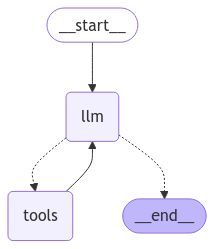

In [30]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))


In [31]:
# Qual é a composição do suplemento alimentar X?
# Quais são os efeitos do suplemento alimentar X? / O que faz o suplemento alimentar X?
# O que acontece se consumir X e tomar o suplemento alimentar Y?
# Como é o processo de toma do suplemento alimentar X?

# Ingredientes
question1 = "Quais são os ingredientes do Condotril?"
question2 = "Quais são os ingredientes do Duobiotic?"
question3 = "Quais são os ingredientes do Neurofil?"

# Benefícios
question4 = "Quais são os benefícios do Condotril?"
question5 = "Quais são os benefícios do Duobiotic?"
question6 = "Quais são os benefícios do Neurofil?"

# Efeitos
question7 = "Quais são os efeitos do Condotril?"
question8 = "Quais são os efeitos do Duobiotic?"
question9 = "Quais são os efeitos do Nueurofil?"

# Processo de toma
question10 = "Qual é o processo de toma do Condotril?"
question11 = "Qual é o processo de toma do Duobiotic?"
question12 = "Qual é o processo de toma do Neurofil?"

# Condições de armazenamento
question13 = "Quais são as condições de armazenamento do Condotril?"
question14 = "Quais são as condições de armazenamento do Duobiotic?"
question15 = "Quais são as condições de armazenamento do Neurofil?"

# Precaussões
question16 = "Em que casos não se pode tomar Condotril?"
question17 = "Em que casos não se pode tomar Duobiotic?"
question18 = "Em que casos não se pode tomar Neurofil?"

In [33]:
response1 = graph.invoke({'messages': [system_prompt, HumanMessage(content=question1)]}, debug=True)

[-1:checkpoint] State at the end of step -1:
{'messages': []}
[0:tasks] Starting 1 task for step 0:
- __start__ -> {'messages': [SystemMessage(content='Your role is to act as a thorough research assistant, providing complete and detailed answers based on the given context. \n  \nYour final answer should be as complete as possible. Do not oversimplify or summarize unnecessaraly, considering the results of the tools you used.\nDo not oversimplify or summarize the answer.\n\nIf you are unsure about what tool to use or how to correct an error, you should ask the user for help.', additional_kwargs={}, response_metadata={}, id='ffbcc25e-d6e8-4f1b-b255-03c972a5419e'),
              HumanMessage(content='Quais são os ingredientes do Condotril?', additional_kwargs={}, response_metadata={})]}
[0:writes] Finished step 0 with writes to 1 channel:
- messages -> [SystemMessage(content='Your role is to act as a thorough research assistant, providing complete and detailed answers based on the given co

In [35]:
print("Pergunta: ", question1)
print("Resposta: ", response1['messages'][-1].content)

Pergunta:  Quais são os ingredientes do Condotril?
Resposta:  Os ingredientes do Condotril são:

- Sulfato de Glucosamina
- Sulfato de Condroitina
- MSM (Manganês)
- Vitamina C
- Manganês
- Ácido hialurônico
- Edulcorante: Sucralose

Esses ingredientes são listados em ordem alfabética na fórmula do produto.


In [36]:
response2 = graph.invoke({'messages': [system_prompt, HumanMessage(content=question2)]}, debug=True)

[-1:checkpoint] State at the end of step -1:
{'messages': []}
[0:tasks] Starting 1 task for step 0:
- __start__ -> {'messages': [SystemMessage(content='Your role is to act as a thorough research assistant, providing complete and detailed answers based on the given context. \n  \nYour final answer should be as complete as possible. Do not oversimplify or summarize unnecessaraly, considering the results of the tools you used.\nDo not oversimplify or summarize the answer.\n\nIf you are unsure about what tool to use or how to correct an error, you should ask the user for help.', additional_kwargs={}, response_metadata={}, id='ffbcc25e-d6e8-4f1b-b255-03c972a5419e'),
              HumanMessage(content='Quais são os ingredientes do Duobiotic?', additional_kwargs={}, response_metadata={})]}
[0:writes] Finished step 0 with writes to 1 channel:
- messages -> [SystemMessage(content='Your role is to act as a thorough research assistant, providing complete and detailed answers based on the given co

In [37]:
print("Pergunta: ", question2)
print("Resposta: ", response2['messages'][-1].content)

Pergunta:  Quais são os ingredientes do Duobiotic?
Resposta:  Os ingredientes do Duobiotic são:

* Fruto-oligossacarídeos
* Inulina
* Maltodextrina de arroz (agente de volume)
* Lactobacillus rhamnosus
* Bifidobacterium bifidum
* Bifidobacterium longum
* Lactobacillus acidophilus
* Lactobacillus bulgaricus
* Streptococcus thermophilus
* Aroma de iogurte
* Dióxido de silício (antiaglomerante)
* Sucralose (edulcorante)
* Nicotinamida (Vitamina B3)
* D-pantotenato de cálcio (Vitamina B5)
* Cloridrato de piridoxina (Vitamina B6)
* Cloridrato de tiameína (Vitamina B1)
* Icido fólico (Icido pteroilmonoglutâmico)
* Filoquinona (Vitamina K)
* Cianocobalamina (Vitamina B12)

Esses ingredientes são encontrados na embalagem do Duobiotic.


In [38]:
response3 = graph.invoke({'messages': [system_prompt, HumanMessage(content=question3)]}, debug=True)

[-1:checkpoint] State at the end of step -1:
{'messages': []}
[0:tasks] Starting 1 task for step 0:
- __start__ -> {'messages': [SystemMessage(content='Your role is to act as a thorough research assistant, providing complete and detailed answers based on the given context. \n  \nYour final answer should be as complete as possible. Do not oversimplify or summarize unnecessaraly, considering the results of the tools you used.\nDo not oversimplify or summarize the answer.\n\nIf you are unsure about what tool to use or how to correct an error, you should ask the user for help.', additional_kwargs={}, response_metadata={}, id='ffbcc25e-d6e8-4f1b-b255-03c972a5419e'),
              HumanMessage(content='Quais são os ingredientes do Neurofil?', additional_kwargs={}, response_metadata={})]}
[0:writes] Finished step 0 with writes to 1 channel:
- messages -> [SystemMessage(content='Your role is to act as a thorough research assistant, providing complete and detailed answers based on the given con

In [39]:
print("Pergunta: ", question3)
print("Resposta: ", response3['messages'][-1].content)

Pergunta:  Quais são os ingredientes do Neurofil?
Resposta:  Os ingredientes do Neurofil são:

- Proteínas de membrana
- Proteínas de cálcio
- Proteínas de fosfato
- Glicoproteínas
- Lipoproteínas

Esses componentes são presentes na estrutura e função da proteína neurofilamento.


In [41]:
bonus_question = "Qual é a diferença entre Duobiotic e Neurofil?"
response4 = graph.invoke({'messages': [system_prompt, HumanMessage(content=bonus_question)]}, debug=True)

[-1:checkpoint] State at the end of step -1:
{'messages': []}
[0:tasks] Starting 1 task for step 0:
- __start__ -> {'messages': [SystemMessage(content='Your role is to act as a thorough research assistant, providing complete and detailed answers based on the given context. \n  \nYour final answer should be as complete as possible. Do not oversimplify or summarize unnecessaraly, considering the results of the tools you used.\nDo not oversimplify or summarize the answer.\n\nIf you are unsure about what tool to use or how to correct an error, you should ask the user for help.', additional_kwargs={}, response_metadata={}, id='ffbcc25e-d6e8-4f1b-b255-03c972a5419e'),
              HumanMessage(content='Qual é a diferença entre Duobiotic e Neurofil?', additional_kwargs={}, response_metadata={})]}
[0:writes] Finished step 0 with writes to 1 channel:
- messages -> [SystemMessage(content='Your role is to act as a thorough research assistant, providing complete and detailed answers based on the g

In [ ]:
import textwrap
line_width = 175  # ajuste para a largura desejada
response4 = textwrap.fill(response4['messages'][-1].content, width=line_width)

print("Pergunta:", bonus_question)
print("Resposta:\n", response4)

Pergunta: Qual é a diferença entre Duobiotic e Neurofil?
Resposta:
 A diferença principal entre Duobiotic e Neurofil é a presença de microrganismos benéficos na formulação do Duobiotic, enquanto que o Neurofil não contém suplementos
alimentares. O Duobiotic é um suplemento alimentar que combina lactobacilos e bifidobacteirias com determinadas substâncias nutrientes, como a inulina, maltodextrina de arroz,
lactobacillos e bifidobacterianas, para promover o crescimento e viabilidade de microrganismos benéficos na flora intestinal. Já o Neurofil é um suplemento alimentar que não
contém microorganismos, mas pode conter substâncias nutrientes e antioxidantes.
